In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from utils import *

np.random.seed(1)

### Tutte's 1963 Barycentric Method

It took 1 iterations to converge


<IPython.core.display.Javascript object>


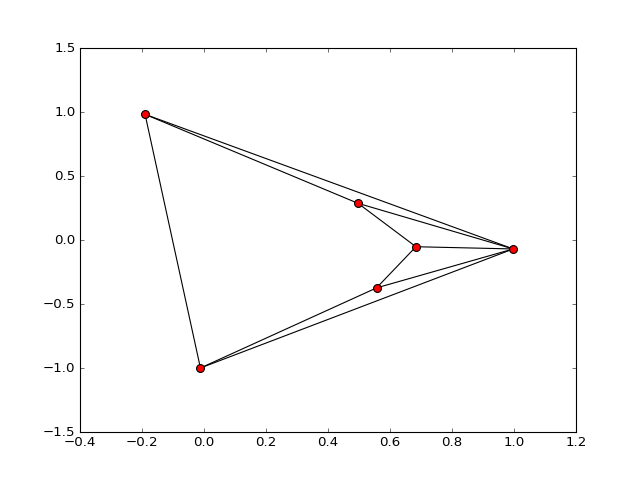

In [9]:
class Barycenter:
    '''
    Tutte's algorith for straight-line, crossings free drawings of
    3-connected planar graphs.

    William T. Tutte. How to draw a graph. Proc. London Math. Society,
    13(52):743–768, 1963
    '''

    def __init__(self, G, N_fixed=3):
        assert N_fixed == 3 # Currently only works with 3 fixed nodes

        self.G = G
        self.M = nx.to_scipy_sparse_matrix(G, dtype='f')
        
        self.N_nodes = self.M.shape[0]
        self.N_fixed = N_fixed
        self.N_free = self.N_nodes - N_fixed

        nodes = np.arange(self.N_nodes)
        self.pos = np.empty([self.N_nodes, 2])

        thetas = np.random.random_sample((self.N_fixed)) * 2.0 * np.pi
        np.sort(thetas)

        # plot fixed points on perimeter of unit circle
        # need to order k-cycle nodes in order
        for i in range(self.N_fixed):
            self.pos[i] = [np.cos(thetas[i]), np.sin(thetas[i])]

        self.degree = self.M.toarray().sum(axis=1).flatten()

    def run(self):
        converged = False
        self.iterations = 0

        while not converged:
            old_pos = np.copy(self.pos)

            for i in range(self.N_fixed, self.N_nodes):
                self.pos[i] = np.sum([self.pos[j] for j in self.M[i].indices], axis=0) / self.degree[i]

            self.iterations += 1
            converged = np.array_equal(old_pos, self.pos)

    def display(self):
        display_plot(self.G, dict(zip(G.nodes(), self.pos)))

# make a 3-connected undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), 
                  (2, 3), (3, 4), (4, 5), (5, 6), (6, 2)])
graph = Barycenter(G, N_fixed=3)
graph.run()
print('It took {} iterations to converge'.format(graph.iterations))
graph.display()